RANDOM FOREST

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [6]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RF_dataset.csv')
# Basic data exploration
print("Dataset Head:\n", df.head())
print("Dataset Info:\n", df.info())
print("Class Distribution:\n", df['Target'].value_counts())

Dataset Head:
    Feature1  Feature2  Feature3  Feature4  Target
0       5.1       3.5       1.4       0.2       0
1       4.9       3.0       1.4       0.2       0
2       4.7       3.2       1.3       0.2       0
3       6.5       3.0       5.2       2.0       1
4       5.8       2.7       5.1       1.9       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  14 non-null     float64
 1   Feature2  14 non-null     float64
 2   Feature3  14 non-null     float64
 3   Feature4  14 non-null     float64
 4   Target    14 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 692.0 bytes
Dataset Info:
 None
Class Distribution:
 Target
1    6
0    4
2    4
Name: count, dtype: int64


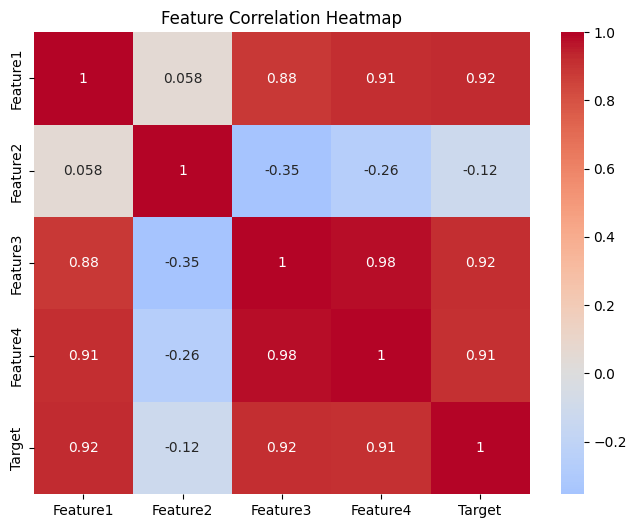

In [8]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [9]:
# Features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict test set
y_pred = rf.predict(X_test)

In [13]:
# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.80


In [15]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

[[2 0 0]
 [0 2 0]
 [0 1 0]]


In [11]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


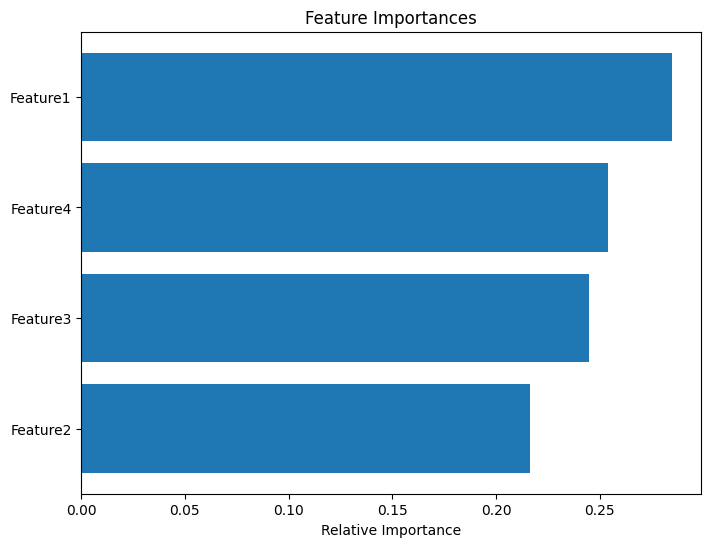

In [16]:
# Feature importance plot
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [18]:
# Testing with new inputs
new_inputs = [
    [6.1, 3.0, 4.9, 1.8],  # Sample 1
    [5.0, 3.6, 1.4, 0.2]   # Sample 2
]
predicted_classes = rf.predict(new_inputs)

for i, features in enumerate(new_inputs):
    print(f'Input features: {features} => Predicted class: {predicted_classes[i]}')

Input features: [6.1, 3.0, 4.9, 1.8] => Predicted class: 1
Input features: [5.0, 3.6, 1.4, 0.2] => Predicted class: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
